In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [2]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data()
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6736
2246
2246
46


In [3]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
    one_hot = np.zeros((data.shape[0], 10000))
    for d in range(data.shape[0]):
        for i in data[d]:
            if i >= dim:
                continue
            one_hot[d,i] = 1
    return one_hot

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)


# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [4]:
# 문제 2-3: 빠른 학습과 과대적합을 방지하기 위해 BatchNormalization과 Dropout을 적용한 딥러닝 모델을 구성합니다.
from tensorflow import keras

model = keras.Sequential()
model.add(layers.Dense(1024, input_shape=(10000,), kernel_initializer='glorot_uniform'))
model.add(layers.BatchNormalization())
model.add(layers.Activation('sigmoid'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(46, kernel_initializer='glorot_uniform', activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              10241024  
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
activation (Activation)      (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                47150     
Total params: 10,292,270
Trainable params: 10,290,222
Non-trainable params: 2,048
_________________________________________________________________


In [6]:
# 문제 2-4: ModelCheckpoint와 EarlyStopping 콜백 함수를 적용하여 모델 학습을 진행합니다.
checkpoint_cb = callbacks.ModelCheckpoint('reuters_model.h5', save_best_only=True)
earlystopping_cb = callbacks.EarlyStopping(patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=300, validation_data=(x_val, y_val), 
                    callbacks=[checkpoint_cb, earlystopping_cb])

Epoch 1/300
211/211 [==============================] - 3s 7ms/step - loss: 1.2438 - accuracy: 0.7255 - val_loss: 1.0016 - val_accuracy: 0.7409
Epoch 2/300
211/211 [==============================] - 1s 5ms/step - loss: 0.4127 - accuracy: 0.9042 - val_loss: 0.8317 - val_accuracy: 0.8063
Epoch 3/300
211/211 [==============================] - 1s 5ms/step - loss: 0.2649 - accuracy: 0.9390 - val_loss: 0.8865 - val_accuracy: 0.8037
Epoch 4/300
211/211 [==============================] - 1s 5ms/step - loss: 0.2016 - accuracy: 0.9504 - val_loss: 0.8868 - val_accuracy: 0.8139
Epoch 5/300
211/211 [==============================] - 1s 5ms/step - loss: 0.1723 - accuracy: 0.9565 - val_loss: 0.9507 - val_accuracy: 0.7943


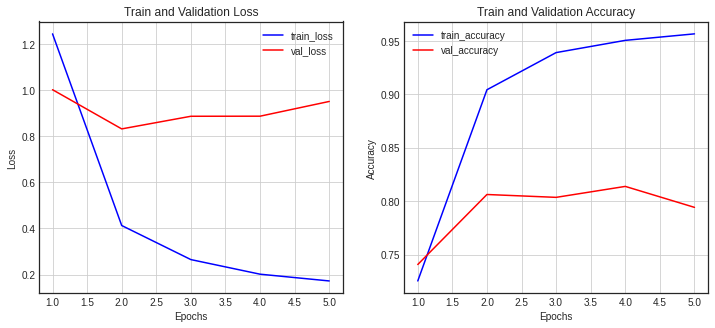

In [7]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [8]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 0.8932 - accuracy: 0.7903


[0.8932445645332336, 0.7902938723564148]